In [13]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
lgbc=lgb.LGBMClassifier()

In [15]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
for i in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
    df[i]=df[i].replace({0:df[i].median()})
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,30.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,23.0,30.5,30.1,0.349,47,1


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [20]:
from sklearn.model_selection import train_test_split

x=df.drop('Outcome',axis=1)
y=df['Outcome']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [27]:
lgbc.fit(x_train,y_train)

y_pred_train=lgbc.predict(x_train)
y_prob_train=lgbc.predict_proba(x_train)[:,1]

y_pred=lgbc.predict(x_test)
y_prob=lgbc.predict_proba(x_test)[:,1]

In [35]:
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score

print('accuracy score on train set ',accuracy_score(y_train,y_pred_train))
print('roc score  on train set ',roc_auc_score(y_train,y_prob_train))


print('accuracy score on test set ',accuracy_score(y_test,y_pred))
print('roc score on test set ',roc_auc_score(y_test,y_prob))

accuracy score on train set  1.0
roc score  on train set  1.0
accuracy score on test set  0.7532467532467533
roc score on test set  0.8275584206285254


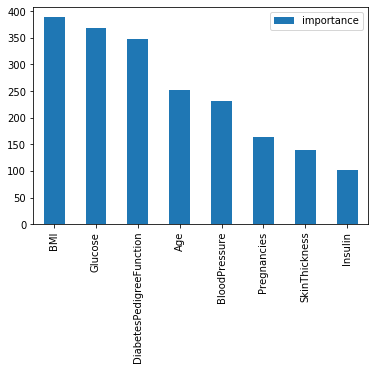

In [34]:
cols=x.columns
lgbc.feature_importances_

fi=pd.DataFrame(lgbc.feature_importances_,index=cols,columns=['importance'])
fi=fi.sort_values('importance',ascending=False)
fi.plot.bar()

### hyperparameter tuning of LGBM

In [41]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV


lgbc=lgb.LGBMClassifier(random_state=1)

params ={'n_estimators':sp_randint(5,250),
     'max_depth':sp_randint(2,20),
     'num_leaves':sp_randint(5,50),
     'min_child_samples':sp_randint(1,20)}

rand_search_lgbc=RandomizedSearchCV(lgbc,param_distributions=params,cv=3,random_state=1)


rand_search_lgbc.fit(x,y)
print(rand_search_lgbc.best_params_)

{'max_depth': 3, 'min_child_samples': 1, 'n_estimators': 65, 'num_leaves': 22}


In [42]:
lgbc=lgb.LGBMClassifier(**rand_search_lgbc.best_params_)

lgbc.fit(x_train,y_train)

y_pred_train= lgbc.predict(x_train)
y_pred_test=lgbc.predict(x_test)
y_prob_test=lgbc.predict_proba(x_test)[:,1] #used to calculate AUC
y_prob_train=lgbc.predict_proba(x_train)[:,1]


print('Accuracy of Decision Tree on Train: ',accuracy_score(y_pred_train,y_train))
print('Accuracy of Decision Tree on Test: ',accuracy_score(y_pred_test,y_test))


print('AUC of Train:',roc_auc_score(y_train,y_prob_train))
print('AUC of Test:',roc_auc_score(y_test,y_prob_test))


Accuracy of Decision Tree on Train:  0.8789571694599627
Accuracy of Decision Tree on Test:  0.7922077922077922
AUC of Train: 0.9596338489086474
AUC of Test: 0.8688154713940371


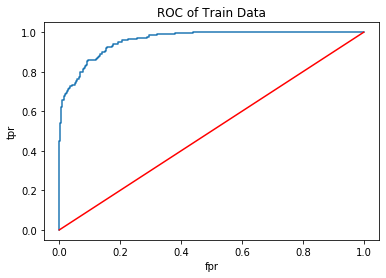

In [43]:
fpr,tpr,thresholds=roc_curve(y_train,y_prob_train)



plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC of Train Data')
plt.show()